In [1]:
import pandas as pd
import numpy as np

### Making a linear dataset

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=10000, n_features=1, random_state=4, noise=10, bias = 4)

In [3]:
X

array([[ 0.79162236],
       [ 1.68915179],
       [-0.58102811],
       ...,
       [ 0.07033632],
       [-0.97300417],
       [ 0.86363129]])

In [4]:
y

array([ 53.48775797, 130.72979632, -30.64185979, ...,  20.78771567,
       -61.12050819,  62.7818479 ])

### take a look at the data

In [5]:
df = pd.DataFrame(X, columns=['X'])
df['y'] = y

df.plot(x='X', y='y', kind='scatter')

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

### making the funtion

In [29]:
class lin_reg():
    def __init__(self, alpha):
        self.alpha = alpha
        self.theta = np.zeros(1)

    def fit(self, X, y):
    
        # set starting values
        self.theta = np.zeros(X.shape[1]+1)

        if X.shape[0] != y.shape[0]:
            print('X and y are different sizes.')

        # length of all
        m = X.shape[0]

        # create a dummy set for the bias
        X_dummy = np.array([1]*m)

        # training
        for x_n, dummy, y_n in zip(X, X_dummy, y):
            y_hat = self.theta[0] + dummy
            for theta_i, x_i in zip(self.theta[1:], x_n):
                y_hat += theta_i*x_i

            self.theta[0] -= (self.alpha/m)*(y_hat - y_n)
            for i, x_i in enumerate(x_n):
                self.theta[i+1] -= (self.alpha/m)*(y_hat - y_n)*(x_i)
                
    def predict(self, X):
        result = np.array([1]*X.shape[0])*self.theta[0]
        
        for i, x in zip(self.theta[1:], X.T):
            result = result + (i*x)
            
        return result

### define and fit the model

In [30]:
model = lin_reg(alpha=10)

model.fit(X, y)

model.theta

array([ 2.990258  , 56.45781623])

In [34]:
X[0:3]

array([[ 0.79162236],
       [ 1.68915179],
       [-0.58102811]])

In [32]:
model.predict(X[0:3])

array([ 47.68352796,  98.35607934, -29.81332039])

### see the results

In [19]:
import matplotlib.pyplot as plt 

plt.plot(X, y, 'o', label='data')

xx = np.linspace(X.min(), X.max(), 100)

yy = model.theta[0] + model.theta[1]*xx

plt.plot(xx, yy, label='least squares fit, $y = a + bx$')

ModuleNotFoundError: No module named 'matplotlib'

### compare to the sklearn regression

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.intercept_, reg.coef_

(3.8646176121029163, array([56.53034544]))

In [33]:
reg.predict(X[0:3])

array([ 48.61530332,  99.3529518 , -28.98110229])

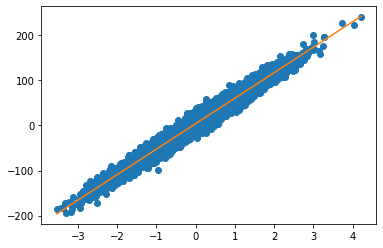

In [67]:
plt.plot(X, y, 'o', label='data')

xx = np.linspace(X.min(), X.max(), 100)

yy = reg.intercept_ + reg.coef_*xx

plt.plot(xx, yy, label='least squares fit, $y = a + bx$')